## Bais and Variance

In [83]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def load_data():
    """
    for ex5
    d['X']shape = (12,1)
    pandas has trouble taking this 2d ndarray to construct a dataframe ,so I ravel 
    the result
    """
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel,[d['X'],d['y'],d['Xval'],d['yval'],d['Xtest'],d['ytest']])

In [85]:
X , y ,Xval , yval, Xtest ,ytest = load_data()

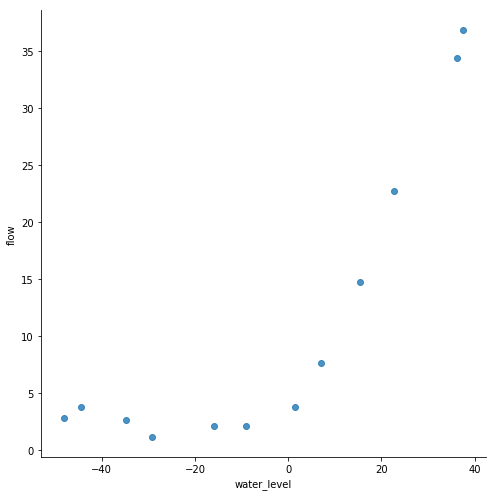

In [86]:
df = pd.DataFrame({'water_level':X ,'flow':y})

sns.lmplot('water_level','flow',data=df,fit_reg=False,height=7)
plt.show()

In [87]:
X,Xval,Xtest = [np.insert(x.reshape(x.shape[0],1),0,np.ones(x.shape[0]),axis =1)for x in (X,Xval,Xtest)]

## 代价函数
$J(\theta) = \frac{1}{2m}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$

In [88]:
def cost(theta,X,y):
    """
    X : R(m*n),m records ,n features
    y : R(m)
    theta : R(n),linear regression parameters 
    """
    m = X.shape[0]
    inner = X @ theta - y
    square_sum = inner.T @ inner 
    cost = square_sum / (2*m)
    return cost

In [89]:
theta = np.ones(X.shape[1])
cost(theta,X,y)

303.9515255535976

## 梯度
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)$

In [90]:
def gradient(theta,X,y):
    m = X.shape[0]
    inner = X.T @ (X@theta - y)
    return inner/m

In [91]:
gradient(theta,X,y)

array([-15.30301567, 598.16741084])

## 正则化梯度
$\frac{\partial\ J(\theta)}{\partial\theta_o} = \frac{1}{m}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$  &nbsp; &nbsp;for j=0<br>
$\frac{\partial\ J(\theta)}{\partial\theta_j}= (\frac{1}{m}\sum_\limits{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2) + \frac{\lambda}{m}\theta_j$ &nbsp;&nbsp;&nbsp;&nbsp;for j$>=$1


In [92]:
def regularized_gradient(theta ,X ,y,l=1):
    m = X.shape[0]
    regularized_term = theta.copy()
    print (theta)
    regularized_term[0] = 0 # 正则化j>=1 
    print (regularized_term)
    regularized_term = (l/m) * regularized_term
    
    return gradient(theta,X,y) + regularized_term

In [93]:
regularized_gradient(theta,X,y)

[1. 1.]
[0. 1.]


array([-15.30301567, 598.25074417])

## 拟合数据
> 正则化项 $\lambda = 0$

In [94]:
def linear_regression_np(X,y,l=1):
    theta = np.ones(X.shape[1])
    res = opt.minimize(
                        fun = regularized_cost,
                        x0 = theta,
                        args = (X , y, l),
                        method = 'TNC',
                        jac = regularized_gradient,
                        options = {'disp':True}
    )
    
    return res

In [95]:
def regularized_cost(theta,X,y,l=1):
    m = X.shape[0]
    regularized_term = (l /(2*m)) * np.power(theta[1:],2).sum()
    return cost (theta,X,y) + regularized_term

In [96]:
theta = np.ones(X.shape[0])
final_theta = linear_regression_np(X,y,l=0).get('x')

[1. 1.]
[0. 1.]
[1.         0.99999997]
[0.         0.99999997]
[1.01803303 0.29512118]
[0.         0.29512118]
[1.01803307 0.29512118]
[0.         0.29512118]
[10.05614589  0.52634537]
[0.         0.52634537]
[10.05614679  0.52634532]
[0.         0.52634532]
[13.08790348  0.36777923]
[0.         0.36777923]
[13.08790348  0.36777923]
[0.         0.36777923]


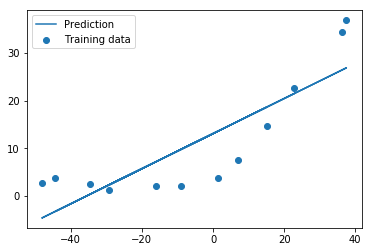

In [97]:
b = final_theta[0]
m = final_theta[1]

#print (b,m)
plt.scatter(X[:,1],y,label="Training data")
plt.plot(X[:,1],X[:,1]*m +b ,label="Prediction")
plt.legend(loc=2)
plt.show()

In [98]:
training_cost,cv_cost= [],[]

1.使用训练集的子集来拟合应模型

2.在计算训练代价和交叉验证代价时，没有用正则化

3.记住使用相同的训练集子集来计算训练代价

In [99]:
m = X.shape[0]
for i  in range(1,m+1):
    res = linear_regression_np(X[:i,:],y[:i],l=0)
    tc = regularized_cost(res.x,X[:i,:],y[:i],l=0)
    cv = regularized_cost(res.x,Xval,yval,l=0)
    
    training_cost.append(tc)
    cv_cost.append(cv)

[1. 1.]
[0. 1.]
[1.         0.99999997]
[0.         0.99999997]
[ 1.06695055 -0.06697472]
[ 0.         -0.06697472]
[ 1.06695055 -0.06697472]
[ 0.         -0.06697472]
[1. 1.]
[0. 1.]
[1.         0.99999997]
[0.         0.99999997]
[ 1.04196123 -0.01925107]
[ 0.         -0.01925107]
[ 1.04196128 -0.01925107]
[ 0.         -0.01925107]
[3.29158714 0.07336565]
[0.         0.07336565]
[3.2915872  0.07336563]
[0.         0.07336563]
[3.29319568 0.07271775]
[0.         0.07271775]
[3.29319568 0.07271775]
[0.         0.07271775]
[1. 1.]
[0. 1.]
[1.         0.99999997]
[0.         0.99999997]
[1.01806879 0.49010701]
[0.         0.49010701]
[1.01806883 0.49010701]
[0.         0.49010701]
[8.24459182 0.74618961]
[0.         0.74618961]
[8.2445928  0.74618957]
[0.         0.74618957]
[14.1549899   0.53912266]
[0.         0.53912266]
[14.1549899   0.53912266]
[0.         0.53912266]
[1. 1.]
[0. 1.]
[1.         0.99999997]
[0.         0.99999997]
[1.01099101 0.66133302]
[0.         0.66133302]
[1.0

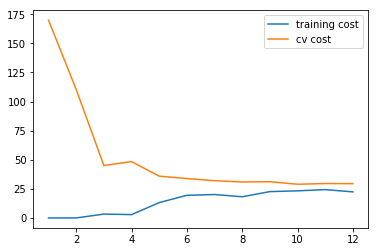

In [100]:
plt.plot(np.arange(1,m+1),training_cost,label='training cost')
plt.plot(np.arange(1,m+1),cv_cost,label='cv cost')
plt.legend(loc=1)
plt.show()

result : 这个模型欠拟合了！

## 创建多项式特征：

In [101]:
def prepare_poly_data(*args,power):
    def prepare(x):
        #expand feature 
        df = poly_features(x, power=power)
        #print (df)
        #normalization
        ndarr = normalize_feature(df).values
        #print (ndarr)
        #add intercept term 
        return np.insert(ndarr,0,np.ones(ndarr.shape[0]),axis=1)
    return [prepare(x) for x in args]

In [102]:
def poly_features(x,power, as_ndarray = False):
    data = {'f{}'.format(i) : np.power(x,i) for i  in range(1,power+1)}
    df = pd.DataFrame(data)
    
    return df.as_matrix() if as_ndarray  else df 

In [103]:
X,y,Xval,yval,Xtest,ytest = load_data()

In [104]:
poly_features(X,power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


# 准备多项式回归数据
1. 扩展特征到 8阶,或者你需要的阶数
2. 使用 **归一化** 来合并 $x^n$ 
3. don't forget intercept term

In [105]:
def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column.std())

In [106]:
X_poly,Xval_poly,Xtest_poly = prepare_poly_data(X,Xval,Xtest,power=8)

In [107]:
X_poly[:3,:]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

## 画出学习曲线：
> 首先,我们没有使用正则化,所以 $\lambda = 0$

In [117]:
def plot_learning_curve(X,y,Xval,yval,l=0):
    training_cost,cv_cost = [],[]
    m = X.shape[0]
    
    for i  in range(1,m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression_np(X[:i,:],y[:i],l=l)
        # remember ,when you compute the cost here ,you are computing
        # non-regularized cost,Regularization is used to fit parameters only
        tc = cost(res.x ,X[:i,:],y[:i])
        cv = cost(res.x ,Xval,yval)
        
        training_cost.append(tc)
        cv_cost.append(cv)
    #return training_cost,cv_cost
    plt.plot(np.arange(1,m+1),training_cost,label = 'training cost')
    plt.plot(np.arange(1,m+1),cv_cost,label = 'cv cost')
    plt.legend(loc=1)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000019 0.99999993 0.99999985 1.00000004 0.99999986 1.00000006
 0.99999989 1.00000007 0.9999999 ]
[0.         0.99999993 0.99999985 1.00000004 0.99999986 1.00000006
 0.99999989 1.00000007 0.9999999 ]
[2.05571103 0.61768399 0.20284665 1.19237787 0.25446752 1.32369992
 0.37620392 1.36370913 0.46319083]
[0.         0.61768399 0.20284665 1.19237787 0.25446752 1.32369992
 0.37620392 1.36370913 0.46319083]
[2.05571103 0.61768399 0.20284665 1.19237787 0.25446752 1.32369992
 0.37620392 1.36370913 0.46319083]
[0.         0.61768399 0.20284665 1.19237787 0.25446752 1.32369992
 0.37620392 1.36370913 0.46319083]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000016 0.99999992 0.99999993 1.         0.99999991 1.00000004
 0.99999992 1.00000005 0.99999992]
[0.         0.99999992 0.99999993 1.         0.99999991 1.00000004
 0.99999992 1.00000005 0.99999992]
[1.         1.         0.99999999 1.         1.         1.
 1.      

 2.77051321 3.03297434 2.20447641]
[0.         5.52703786 4.85241137 5.57034959 3.68730368 4.25689205
 2.77051321 3.03297434 2.20447641]
[9.44690579 5.52703797 4.85241127 5.57034963 3.68730363 4.25689199
 2.7705132  3.03297422 2.20447645]
[0.         5.52703797 4.85241127 5.57034963 3.68730363 4.25689199
 2.7705132  3.03297422 2.20447645]
[9.44690581 5.52703789 4.85241141 5.5703496  3.68730363 4.256892
 2.77051315 3.03297426 2.20447638]
[0.         5.52703789 4.85241141 5.5703496  3.68730363 4.256892
 2.77051315 3.03297426 2.20447638]
[9.55486742 5.7960075  4.74367948 5.64647886 3.50818557 4.06404064
 2.68280348 2.70143915 2.20341974]
[0.         5.7960075  4.74367948 5.64647886 3.50818557 4.06404064
 2.68280348 2.70143915 2.20341974]
[9.55486743 5.79600755 4.74367948 5.64647889 3.50818555 4.06404062
 2.68280345 2.70143911 2.20341971]
[0.         5.79600755 4.74367948 5.64647889 3.50818555 4.06404062
 2.68280345 2.70143911 2.20341971]
[9.55486745 5.79600775 4.74367954 5.64647898 3.5081

   6.99416702   2.81942903   4.99978455  17.93678421]
[  0.          12.7685672   16.10659385  -3.8457257  -23.03512372
   6.99416702   2.81942903   4.99978455  17.93678421]
[ 10.27286686  12.76856782  16.10659539  -3.84572557 -23.03512736
   6.99416849   2.81942987   4.99978538  17.93678755]
[  0.          12.76856782  16.10659539  -3.84572557 -23.03512736
   6.99416849   2.81942987   4.99978538  17.93678755]
[ 10.2728585   12.76856597  16.10662026  -3.84573307 -23.03519975
   6.99419006   2.81944174   4.99979805  17.93684676]
[  0.          12.76856597  16.10662026  -3.84573307 -23.03519975
   6.99419006   2.81944174   4.99979805  17.93684676]
[ 10.27264231  12.76852037  16.10770635  -3.84610717 -23.03890879
   6.99523438   2.82006196   5.00036562  17.9398959 ]
[  0.          12.76852037  16.10770635  -3.84610717 -23.03890879
   6.99523438   2.82006196   5.00036562  17.9398959 ]
[ 10.27264231  12.76852037  16.10770635  -3.84610717 -23.03890879
   6.99523438   2.82006196   5.00036562 

[ 11.28757261  13.05895923  10.8879327   -1.18346129 -14.78453388
  -5.88707329  17.34438482  12.62690869  -1.36664623]
[  0.          13.05895923  10.8879327   -1.18346129 -14.78453388
  -5.88707329  17.34438482  12.62690869  -1.36664623]
[ 11.28757261  13.05895923  10.88793269  -1.18346129 -14.78453388
  -5.8870733   17.34438484  12.62690869  -1.36664625]
[  0.          13.05895923  10.88793269  -1.18346129 -14.78453388
  -5.8870733   17.34438484  12.62690869  -1.36664625]
[ 11.34104459  13.06007753  10.85840692  -0.13422812 -14.67083729
  -7.40029596  18.67444159  12.39928164  -3.48313786]
[  0.          13.06007753  10.85840692  -0.13422812 -14.67083729
  -7.40029596  18.67444159  12.39928164  -3.48313786]
[ 11.34104459  13.06007752  10.85840692  -0.13422812 -14.67083729
  -7.40029596  18.67444159  12.39928164  -3.48313786]
[  0.          13.06007752  10.85840692  -0.13422812 -14.67083729
  -7.40029596  18.67444159  12.39928164  -3.48313786]
[ 11.34104459  13.06007751  10.85840691 

  -5.99811021   6.31004199   8.42706638   3.46169514]
[  0.          12.80838036  13.5190612    1.23361962 -13.10826334
  -5.99811021   6.31004199   8.42706638   3.46169514]
[ 10.95307803  12.80838029  13.51906119   1.2336198  -13.10826293
  -5.99810981   6.31004138   8.42706557   3.46169505]
[  0.          12.80838029  13.51906119   1.2336198  -13.10826293
  -5.99810981   6.31004138   8.42706557   3.46169505]
[ 11.01366269  12.84626563  13.5157402    1.08547955 -13.46201145
  -6.3389084    6.82941807   9.09599757   3.5419965 ]
[  0.          12.84626563  13.5157402    1.08547955 -13.46201145
  -6.3389084    6.82941807   9.09599757   3.5419965 ]
[ 11.0136627   12.84626563  13.51574019   1.08547954 -13.46201148
  -6.33890842   6.8294181    9.09599762   3.54199651]
[  0.          12.84626563  13.51574019   1.08547954 -13.46201148
  -6.33890842   6.8294181    9.09599762   3.54199651]
[ 11.01366269  12.84626563  13.5157402    1.08547955 -13.46201145
  -6.3389084    6.82941808   9.09599759 

[10.51555341  6.14351841  4.68955266  4.97898469  3.53206683  3.79564383
  2.5374513   2.90015185  1.83167767]
[0.         6.14351841 4.68955266 4.97898469 3.53206683 3.79564383
 2.5374513  2.90015185 1.83167767]
[10.51555361  6.14351873  4.68955262  4.97898438  3.53206668  3.79564356
  2.53745114  2.90015173  1.83167749]
[0.         6.14351873 4.68955262 4.97898438 3.53206668 3.79564356
 2.53745114 2.90015173 1.83167749]
[10.51555354  6.14351854  4.68955292  4.97898444  3.53206686  3.79564366
  2.53745122  2.90015182  1.83167752]
[0.         6.14351854 4.68955292 4.97898444 3.53206686 3.79564366
 2.53745122 2.90015182 1.83167752]
[10.9209757   9.40492756  4.70127914  3.0386445   2.84080243  1.88934906
  1.82830887  1.86844787  0.94612803]
[0.         9.40492756 4.70127914 3.0386445  2.84080243 1.88934906
 1.82830887 1.86844787 0.94612803]
[10.9209757   9.40492773  4.70127915  3.03864443  2.84080238  1.88934901
  1.82830881  1.86844786  0.94612795]
[0.         9.40492773 4.70127915 3.0

[ 11.04996252  11.10889508  20.1873927   11.76104537 -45.09747377
 -36.46636427  47.18879129  36.59306385  -5.28642536]
[  0.          11.10889508  20.1873927   11.76104537 -45.09747377
 -36.46636427  47.18879129  36.59306385  -5.28642536]
[ 11.04996252  11.10889508  20.1873927   11.76104538 -45.09747374
 -36.46636426  47.18879125  36.59306381  -5.28642537]
[  0.          11.10889508  20.1873927   11.76104538 -45.09747374
 -36.46636426  47.18879125  36.59306381  -5.28642537]
[ 11.04996252  11.10889505  20.1873927   11.76104553 -45.09747341
 -36.46636417  47.18879087  36.59306335  -5.28642553]
[  0.          11.10889505  20.1873927   11.76104553 -45.09747341
 -36.46636417  47.18879087  36.59306335  -5.28642553]
[ 11.04996252  11.10889507  20.1873927   11.76104543 -45.09747373
 -36.4663643   47.18879126  36.59306376  -5.28642541]
[  0.          11.10889507  20.1873927   11.76104543 -45.09747373
 -36.4663643   47.18879126  36.59306376  -5.28642541]
[ 11.09289085  10.90423768  20.17378886 

[ 11.17202426  10.91695686  17.37348307  13.74283143 -26.70577228
 -25.08079234  26.7036733   14.95116956  -9.09432831]
[  0.          10.91695686  17.37348307  13.74283143 -26.70577228
 -25.08079234  26.7036733   14.95116956  -9.09432831]
[ 11.17202426  10.9169568   17.37348306  13.74283148 -26.70577236
 -25.08079248  26.70367357  14.95116977  -9.09432838]
[  0.          10.9169568   17.37348306  13.74283148 -26.70577236
 -25.08079248  26.70367357  14.95116977  -9.09432838]
[ 11.17202426  10.91695685  17.37348306  13.74283143 -26.70577229
 -25.08079236  26.70367333  14.95116958  -9.09432831]
[  0.          10.91695685  17.37348306  13.74283143 -26.70577229
 -25.08079236  26.70367333  14.95116958  -9.09432831]
[ 11.17202426  10.91695685  17.37348305  13.74283144 -26.7057723
 -25.08079237  26.70367336  14.95116961  -9.09432832]
[  0.          10.91695685  17.37348305  13.74283144 -26.7057723
 -25.08079237  26.70367336  14.95116961  -9.09432832]
[ 11.14678255  10.61169526  17.06101686  1

 -3.45679073 -3.46496291 -0.16190216]
[ 0.         12.61167971 13.11734205  4.08870398 -4.83067424 -2.31530241
 -3.45679073 -3.46496291 -0.16190216]
[11.21755495 12.61168429 13.1173535   4.08860536 -4.83067783 -2.31518293
 -3.45687373 -3.46498684 -0.16180688]
[ 0.         12.61168429 13.1173535   4.08860536 -4.83067783 -2.31518293
 -3.45687373 -3.46498684 -0.16180688]
[11.21755545 12.61169295 13.11736347  4.08855526 -4.83067759 -2.31511297
 -3.45691863 -3.46499792 -0.16175301]
[ 0.         12.61169295 13.11736347  4.08855526 -4.83067759 -2.31511297
 -3.45691863 -3.46499792 -0.16175301]
[11.21535696 11.66216668 12.512408    9.54871779 -4.72415284 -9.4805442
  1.30101079 -2.09325443 -5.86695807]
[ 0.         11.66216668 12.512408    9.54871779 -4.72415284 -9.4805442
  1.30101079 -2.09325443 -5.86695807]
[11.21535698 11.66216668 12.512408    9.54871779 -4.72415284 -9.4805442
  1.30101079 -2.09325443 -5.86695808]
[ 0.         11.66216668 12.512408    9.54871779 -4.72415284 -9.4805442
  1.3

[ 11.21780081  11.190698    16.91784523  13.484378   -23.47441975
 -25.82887014  20.13153533  15.97190636  -5.0406709 ]
[  0.          11.190698    16.91784523  13.484378   -23.47441975
 -25.82887014  20.13153533  15.97190636  -5.0406709 ]
[ 11.21780081  11.19069802  16.91784523  13.48437797 -23.47441976
 -25.82887015  20.13153535  15.97190641  -5.04067089]
[  0.          11.19069802  16.91784523  13.48437797 -23.47441976
 -25.82887015  20.13153535  15.97190641  -5.04067089]
[ 11.21780081  11.190698    16.91784524  13.48437801 -23.47441975
 -25.82887013  20.13153531  15.97190633  -5.0406709 ]
[  0.          11.190698    16.91784524  13.48437801 -23.47441975
 -25.82887013  20.13153531  15.97190633  -5.0406709 ]
[ 11.21780081  11.190698    16.91784523  13.48437801 -23.47441975
 -25.82887014  20.13153533  15.97190635  -5.0406709 ]
[  0.          11.190698    16.91784523  13.48437801 -23.47441975
 -25.82887014  20.13153533  15.97190635  -5.0406709 ]
[ 11.21898384  11.27336899  17.03687991 

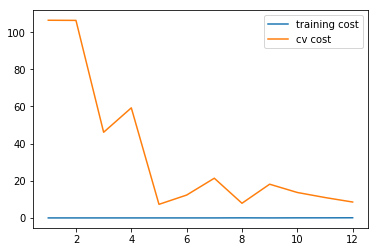

In [118]:
plot_learning_curve(X_poly,y,Xval_poly,yval,l=0)

plt.show()

### 过拟合了

### try $\lambda = 1$

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000019 0.99999987 0.9999998  0.99999998 0.9999998  1.
 0.99999983 1.00000001 0.99999984]
[0.         0.99999987 0.9999998  0.99999998 0.9999998  1.
 0.99999983 1.00000001 0.99999984]
[1.         0.99999997 1.         0.99999994 0.99999999 0.99999994
 0.99999999 0.99999993 0.99999998]
[0.         0.99999997 1.         0.99999994 0.99999999 0.99999994
 0.99999999 0.99999993 0.99999998]
[ 1.92559399 -0.02783861 -0.05673807  0.01219718 -0.05314193  0.02134567
 -0.04466121  0.0241329  -0.03860131]
[ 0.         -0.02783861 -0.05673807  0.01219718 -0.05314193  0.02134567
 -0.04466121  0.0241329  -0.03860131]
[ 1.92559399 -0.02783861 -0.05673807  0.01219718 -0.05314193  0.02134567
 -0.04466121  0.0241329  -0.03860131]
[ 0.         -0.02783861 -0.05673807  0.01219718 -0.05314193  0.02134567
 -0.04466121  0.0241329  -0.03860131]
[ 1.92559399 -0.02783861 -0.05673807  0.01219718 -0.05314192  0.02134567
 -0.04466121  0.0241329  -0.03860

  1.66848771  1.84925597  0.76874544]
[0.         6.59797128 4.27860085 4.47850012 2.98562497 2.93414964
 1.66848771 1.84925597 0.76874544]
[10.60601414  6.59797128  4.27860082  4.47850012  2.98562496  2.93414963
  1.66848773  1.84925596  0.76874547]
[0.         6.59797128 4.27860082 4.47850012 2.98562496 2.93414963
 1.66848773 1.84925596 0.76874547]
[10.60601416  6.59797129  4.27860081  4.47850013  2.98562497  2.93414964
  1.66848774  1.84925597  0.76874548]
[0.         6.59797129 4.27860081 4.47850013 2.98562497 2.93414964
 1.66848774 1.84925597 0.76874548]
[10.60601414  6.59797128  4.27860085  4.47850012  2.98562497  2.93414964
  1.66848771  1.84925597  0.76874544]
[0.         6.59797128 4.27860085 4.47850012 2.98562497 2.93414964
 1.66848771 1.84925597 0.76874544]
[10.88715238  6.74983549  3.68078793  4.50580932  2.93524958  2.85112713
  1.97614595  1.72871907  1.25435483]
[0.         6.74983549 3.68078793 4.50580932 2.93524958 2.85112713
 1.97614595 1.72871907 1.25435483]
[10.8871

  1.99405156  1.93367892  1.21383521]
[0.         6.50596821 4.27512448 4.59579721 3.10754111 3.03639314
 1.99405156 1.93367892 1.21383521]
[10.14933392  6.50596819  4.27512447  4.59579719  3.1075411   3.03639314
  1.99405155  1.93367892  1.21383521]
[0.         6.50596819 4.27512447 4.59579719 3.1075411  3.03639314
 1.99405155 1.93367892 1.21383521]
[10.14933391  6.50596819  4.27512447  4.5957972   3.1075411   3.03639314
  1.99405156  1.93367891  1.21383521]
[0.         6.50596819 4.27512447 4.5957972  3.1075411  3.03639314
 1.99405156 1.93367891 1.21383521]
[10.1901057   6.52037161  4.41233847  4.50587786  3.13930976  3.02645589
  1.96056698  1.97821939  1.13644564]
[0.         6.52037161 4.41233847 4.50587786 3.13930976 3.02645589
 1.96056698 1.97821939 1.13644564]
[10.19010575  6.52037151  4.41233852  4.50587796  3.13930972  3.02645586
  1.96056691  1.9782193   1.13644558]
[0.         6.52037151 4.41233852 4.50587796 3.13930972 3.02645586
 1.96056691 1.9782193  1.13644558]
[10.1901

[10.95861925  7.3056356   3.55291899  4.21171089  2.65250044  2.67407087
  1.92811096  1.68959276  1.42905972]
[0.         7.3056356  3.55291899 4.21171089 2.65250044 2.67407087
 1.92811096 1.68959276 1.42905972]
[10.95861926  7.30563563  3.55291901  4.21171091  2.65250044  2.6740709
  1.92811093  1.68959279  1.42905968]
[0.         7.30563563 3.55291901 4.21171091 2.65250044 2.6740709
 1.92811093 1.68959279 1.42905968]
[10.95861924  7.30563559  3.55291898  4.21171088  2.65250042  2.67407089
  1.92811092  1.68959279  1.42905967]
[0.         7.30563559 3.55291898 4.21171088 2.65250042 2.67407089
 1.92811092 1.68959279 1.42905967]
[10.95861923  7.30563558  3.55291895  4.21171092  2.65250042  2.67407091
  1.92811094  1.68959278  1.42905972]
[0.         7.30563558 3.55291895 4.21171092 2.65250042 2.67407091
 1.92811094 1.68959278 1.42905972]
[10.99211861  7.59198442  4.00331744  3.90766761  2.76496027  2.47353656
  1.72833145  1.66323357  0.98515463]
[0.         7.59198442 4.00331744 3.907

[10.70834251  7.22104389  4.27848219  4.03579606  2.88742434  2.5982552
  1.87318005  1.80613864  1.11529181]
[0.         7.22104389 4.27848219 4.03579606 2.88742434 2.5982552
 1.87318005 1.80613864 1.11529181]
[10.70834251  7.22104387  4.2784822   4.03579605  2.88742434  2.5982552
  1.87318006  1.80613863  1.11529181]
[0.         7.22104387 4.2784822  4.03579605 2.88742434 2.5982552
 1.87318006 1.80613863 1.11529181]
[10.70834251  7.22104386  4.2784822   4.03579604  2.88742434  2.59825519
  1.87318005  1.80613863  1.11529181]
[0.         7.22104386 4.2784822  4.03579604 2.88742434 2.59825519
 1.87318005 1.80613863 1.11529181]
[10.70834251  7.22104386  4.27848219  4.03579605  2.88742434  2.5982552
  1.87318006  1.80613863  1.11529182]
[0.         7.22104386 4.27848219 4.03579605 2.88742434 2.5982552
 1.87318006 1.80613863 1.11529182]
[10.67444719  7.35401667  4.7006791   3.89920956  2.88346717  2.50056723
  1.6608329   1.78164282  0.75877885]
[0.         7.35401667 4.7006791  3.8992095

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[11.44267411  6.85469581  4.01673855  4.35569419  2.75528424  2.9111921
  2.00034141  2.06787179  1.5232444 ]
[0.         6.85469581 4.01673855 4.35569419 2.75528424 2.9111921
 2.00034141 2.06787179 1.5232444 ]
[11.44267401  6.85469598  4.01673864  4.35569418  2.75528425  2.91119206
  2.00034139  2.06787175  1.52324437]
[0.         6.85469598 4.01673864 4.35569418 2.75528425 2.91119206
 2.00034139 2.06787175 1.52324437]
[11.44267412  6.85469594  4.0167386   4.3556941   2.75528418  2.91119199
  2.00034133  2.06787171  1.52324431]
[0.         6.85469594 4.0167386  4.3556941  2.75528418 2.91119199
 2.00034133 2.06787171 1.52324431]
[11.44267415  6.85469582  4.01673863  4.35569416  2.75528426  2.91119207
  2.00034141  2.06787177  1.52324438]
[0.         6.85469582 4.01673863 4.35569416 2.75528426 2.91119207
 2.00034141 2.06787177 1.52324438]
[11.16933049  8.65415613  4.8636052   3.5374749   2.29943136  1.75682953
  1.22784099  1.147

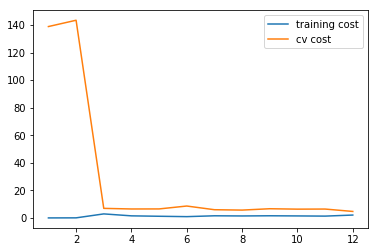

In [119]:
plot_learning_curve(X_poly,y,Xval_poly,yval,l=1)
plt.show()

### try $\lambda = 100$

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999]
[0.         0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.04410225e+00 -3.60126421e-03 -6.45964983e-03  3.58672392e-04
 -6.10397140e-03  1.26351021e-03 -5.26516533e-03  1.53918995e-03
 -4.66576477e-03]
[ 0.         -0.00360126 -0.00645965  0.00035867 -0.00610397  0.00126351
 -0.00526517  0.00153919 -0.00466576]
[ 1.04410232e+00 -3.60126599e-03 -6.45966010e-03  3.58682364e-04
 -6.10398061e-03  1.26352287e-03 -5.26517205e-03  1.53920342e-03
 -4.66576971e-03]
[ 0.         -0.00360127 -0.00645966  0.00035868 -0.00610398  0.00126352
 -0.00526517  0.0015392  -0.00466577]
[ 1.04410266e+00 -3.60126143e-03 -6.45964236e-03  3.58668659e-04
 -6.10396451e-03  1.26350499e-03 -5.26515981e-03  1.53918427e-03
 -4.66576025e-03]
[ 0.         -

[17.90913955  0.61987158  0.3169849   0.41982032  0.26098513  0.26475938
  0.17856767  0.16191426  0.11433613]
[0.         0.61987158 0.3169849  0.41982032 0.26098513 0.26475938
 0.17856767 0.16191426 0.11433613]
[17.909139    0.61987152  0.31698486  0.41982037  0.26098507  0.26475948
  0.17856763  0.1619144   0.11433612]
[0.         0.61987152 0.31698486 0.41982037 0.26098507 0.26475948
 0.17856763 0.1619144  0.11433612]
[17.90913977  0.61987147  0.31698485  0.4198203   0.26098509  0.26475942
  0.17856767  0.16191435  0.11433617]
[0.         0.61987147 0.31698485 0.4198203  0.26098509 0.26475942
 0.17856767 0.16191435 0.11433617]
[17.90913743  0.61987157  0.31698489  0.41982039  0.26098509  0.26475947
  0.17856764  0.16191437  0.11433611]
[0.         0.61987157 0.31698489 0.41982039 0.26098509 0.26475947
 0.17856764 0.16191437 0.11433611]
[17.90913743  0.61987157  0.31698489  0.41982039  0.26098509  0.26475947
  0.17856764  0.16191437  0.11433611]
[0.         0.61987157 0.31698489 0.4

[10.59580106  0.89277913  0.32201799  0.7195597   0.16803999  0.54351087
  0.04454153  0.40908585 -0.03769043]
[ 0.          0.89277913  0.32201799  0.7195597   0.16803999  0.54351087
  0.04454153  0.40908585 -0.03769043]
[10.59580106  0.89277902  0.3220181   0.71955973  0.16804002  0.54351091
  0.0445415   0.40908587 -0.0376905 ]
[ 0.          0.89277902  0.3220181   0.71955973  0.16804002  0.54351091
  0.0445415   0.40908587 -0.0376905 ]
[10.59578905  0.893592    0.32121504  0.71931069  0.16784307  0.54322261
  0.04479715  0.40894526 -0.03716832]
[ 0.          0.893592    0.32121504  0.71931069  0.16784307  0.54322261
  0.04479715  0.40894526 -0.03716832]
[10.59578914  0.89359209  0.32121505  0.71931075  0.16784306  0.54322267
  0.04479713  0.40894534 -0.03716835]
[ 0.          0.89359209  0.32121505  0.71931075  0.16784306  0.54322267
  0.04479713  0.40894534 -0.03716835]
[10.59578916  0.89359201  0.32121506  0.71931069  0.16784309  0.5432226
  0.04479717  0.40894527 -0.03716831]
[ 

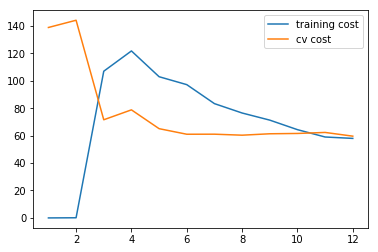

In [120]:
plot_learning_curve(X_poly,y,Xval_poly,yval,l=100)
plt.show()

太多正则化了，欠拟合了

## 找到最佳的 $\lambda$

In [121]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3,1,3,10]
training_cost, cv_cost = [] ,[] 

In [124]:
for l in l_candidate:
    res = linear_regression_np(X_poly,y,l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000002 1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[0.         1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[1.00000002 1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[0.         1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[11.65926198  9.68822622  4.45546529  3.37184022  2.16090681  1.55291005
  1.48431473  1.14449554  1.15723008]
[0.         9.68822622 4.45546529 3.37184022 2.16090681 1.55291005
 1.48431473 1.14449554 1.15723008]
[11.65926184  9.68822631  4.45546545  3.37184025  2.16090686  1.55291008
  1.48431473  1.14449558  1.15723005]
[0.         9.68822631 4.45546545 3.37184025 2.16090686 1.55291008
 1.48431473 1.14449558 1.15723005]
[11.65926199  9.68822623  4.45546538  3.37184018  2.16090679  1.55

[ 11.2192179   10.72977512  16.7469622   15.17424266 -23.08321604
 -26.92963956  20.70204945  15.26458676  -6.42728612]
[  0.          10.72977512  16.7469622   15.17424266 -23.08321604
 -26.92963956  20.70204945  15.26458676  -6.42728612]
[ 11.2192179   10.72977514  16.7469622   15.17424257 -23.08321606
 -26.92963953  20.70204946  15.26458683  -6.42728607]
[  0.          10.72977514  16.7469622   15.17424257 -23.08321606
 -26.92963953  20.70204946  15.26458683  -6.42728607]
[ 11.2192179   10.72977511  16.74696222  15.17424266 -23.08321603
 -26.9296395   20.70204938  15.26458669  -6.4272861 ]
[  0.          10.72977511  16.74696222  15.17424266 -23.08321603
 -26.9296395   20.70204938  15.26458669  -6.4272861 ]
[ 11.21504723  11.12483012  16.92132956  13.61033121 -23.43002
 -25.89044276  20.17905042  15.94504682  -5.15495309]
[  0.          11.12483012  16.92132956  13.61033121 -23.43002
 -25.89044276  20.17905042  15.94504682  -5.15495309]
[ 11.21504723  11.12483013  16.92132955  13.61

[ 11.22344866  11.03150221  14.13070646  11.95269716  -8.6914142
 -12.09695142   3.49246018  -1.38142407  -5.74210524]
[  0.          11.03150221  14.13070646  11.95269716  -8.6914142
 -12.09695142   3.49246018  -1.38142407  -5.74210524]
[ 11.22344866  11.03150221  14.13070647  11.95269716  -8.69141423
 -12.09695142   3.49246019  -1.38142406  -5.74210523]
[  0.          11.03150221  14.13070647  11.95269716  -8.69141423
 -12.09695142   3.49246019  -1.38142406  -5.74210523]
[ 11.22344867  11.0315022   14.1307065   11.95269716  -8.6914143
 -12.09695144   3.49246023  -1.38142402  -5.74210521]
[  0.          11.0315022   14.1307065   11.95269716  -8.6914143
 -12.09695144   3.49246023  -1.38142402  -5.74210521]
[ 11.22344866  11.03150221  14.13070646  11.95269715  -8.69141419
 -12.09695141   3.49246018  -1.38142407  -5.74210524]
[  0.          11.03150221  14.13070646  11.95269715  -8.69141419
 -12.09695141   3.49246018  -1.38142407  -5.74210524]
[ 11.2171681   10.95302286  14.39294386  12.

 -17.60365851  12.86441403   8.7439613   -4.32584896]
[ 11.21807947  11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[  0.          11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[ 11.21807947  11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[  0.          11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[ 11.21807947  11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[  0.          11.57333081  15.54371445  10.56044152 -17.15938554
 -17.66781965  12.91816802   8.78347065  -4.33889768]
[ 11.20250991  11.55239151  15.59117808  10.73038904 -17.26697168
 -17.9114934   13.01608891   8.85696511  -4.39784284]
[  0.          11.55239151  15.59117808  10.73038904 -17.26697168
 -17.9114934   13.01608891   8.85696511 

[ 11.21235568  11.75370057  13.93114078   9.15667739  -8.57404938
 -10.33684988   2.9028217   -0.03036121  -4.02988944]
[  0.          11.75370057  13.93114078   9.15667739  -8.57404938
 -10.33684988   2.9028217   -0.03036121  -4.02988944]
[ 11.21235568  11.75370058  13.93114078   9.1566774   -8.57404933
 -10.33684985   2.90282164  -0.03036128  -4.02988946]
[  0.          11.75370058  13.93114078   9.1566774   -8.57404933
 -10.33684985   2.90282164  -0.03036128  -4.02988946]
[ 11.21235568  11.75370058  13.93114078   9.1566774   -8.57404931
 -10.33684984   2.90282162  -0.03036131  -4.02988947]
[  0.          11.75370058  13.93114078   9.1566774   -8.57404931
 -10.33684984   2.90282162  -0.03036131  -4.02988947]
[ 11.21633266  11.67595985  13.92447688   9.04255195  -9.35090403
 -10.77446546   3.87580356   1.17303097  -3.63237622]
[  0.          11.67595985  13.92447688   9.04255195  -9.35090403
 -10.77446546   3.87580356   1.17303097  -3.63237622]
[ 11.21633266  11.67595985  13.92447688 

[11.21763444 12.60800137 12.22858583  3.70967863 -3.63957709 -2.14478442
 -2.96257735 -2.90946833 -0.66740842]
[ 0.         12.60800137 12.22858583  3.70967863 -3.63957709 -2.14478442
 -2.96257735 -2.90946833 -0.66740842]
[11.22794358 12.39877318 11.96378378  5.2364909  -3.53072196 -4.18681544
 -1.49985727 -2.56267523 -2.42068197]
[ 0.         12.39877318 11.96378378  5.2364909  -3.53072196 -4.18681544
 -1.49985727 -2.56267523 -2.42068197]
[11.22794357 12.39877318 11.96378378  5.23649091 -3.53072196 -4.18681545
 -1.49985727 -2.56267523 -2.42068198]
[ 0.         12.39877318 11.96378378  5.23649091 -3.53072196 -4.18681545
 -1.49985727 -2.56267523 -2.42068198]
[11.22794357 12.39877318 11.96378378  5.23649091 -3.53072196 -4.18681545
 -1.49985727 -2.56267523 -2.42068198]
[ 0.         12.39877318 11.96378378  5.23649091 -3.53072196 -4.18681545
 -1.49985727 -2.56267523 -2.42068198]
[11.20894814 12.35929614 11.96581851  5.30195685 -3.53212436 -4.26539122
 -1.44645669 -2.53860978 -2.50267896]
[

[11.21758458 12.21910184 12.39463921  5.75536047 -4.63301017 -4.95372757
 -0.74167578 -2.06279477 -2.39506502]
[ 0.         12.21910184 12.39463921  5.75536047 -4.63301017 -4.95372757
 -0.74167578 -2.06279477 -2.39506502]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000002 1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[0.         1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[1.00000002 1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[0.         1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[11.67845409  9.35233161  4.41178268  3.5040848   2.24238281  1.72817218
  1.55413831  1.26370864  1.2071963 ]
[0.         9.35233161 4.41178268 3.5040848  2.24238281 1.72817218
 1.55413831 1.26370864 1.2071963 ]
[11.67845395  9.35233171  4.41178283  3.50408483  2.24238

[11.21759911 12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[ 0.         12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[11.21759911 12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[ 0.         12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[11.21759911 12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[ 0.         12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[11.21759911 12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[ 0.         12.44950718 11.0206854   3.61943917 -2.27710244 -2.35461507
 -1.75458191 -1.98278695 -1.62900867]
[11.21758981 12.44980561 11.0210695   3.61826707 -2.27827199 -2.35483856
 -1.75494949 -1.98064497 -1.62676243]
[

[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21758121 12.03280955  9.02226375  2.46499713 -0.01874957 -0.74813428
 -1.12842607 -0.7266094  -1.24829687]
[

[11.18545877  6.67918424  3.81299641  3.74099756  2.23491534  2.19904278
  1.35314026  1.35810969  0.80708252]
[0.         6.67918424 3.81299641 3.74099756 2.23491534 2.19904278
 1.35314026 1.35810969 0.80708252]
[11.18545878  6.67918424  3.81299641  3.74099756  2.23491534  2.19904279
  1.35314026  1.35810971  0.80708251]
[0.         6.67918424 3.81299641 3.74099756 2.23491534 2.19904279
 1.35314026 1.35810971 0.80708251]
[11.18545877  6.67918423  3.81299639  3.74099756  2.23491533  2.19904278
  1.35314026  1.3581097   0.80708251]
[0.         6.67918423 3.81299639 3.74099756 2.23491533 2.19904278
 1.35314026 1.3581097  0.80708251]
[11.22389094  6.66387163  3.8894097   3.74720291  2.25446761  2.20516544
  1.33491382  1.35723295  0.76208661]
[0.         6.66387163 3.8894097  3.74720291 2.25446761 2.20516544
 1.33491382 1.35723295 0.76208661]
[11.22389077  6.66387158  3.88940976  3.747203    2.25446762  2.20516546
  1.33491381  1.35723291  0.76208661]
[0.         6.66387158 3.88940976 3.7

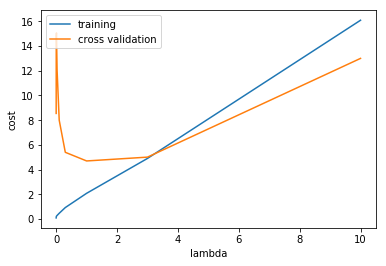

In [125]:
plt.plot(l_candidate,training_cost,label='training')
plt.plot(l_candidate,cv_cost,label= 'cross validation')
plt.legend(loc = 2)
plt.xlabel('lambda')
plt.ylabel('cost')
plt.show()

In [126]:
l_candidate[np.argmin(cv_cost)]

1

In [127]:
for l  in l_candidate :
    theta = linear_regression_np(X_poly,y,l).x
    print ('test cost(l={}) == {}'.format(l,cost(theta,Xtest_poly,ytest)))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000002 1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[0.         1.00000001 1.         1.00000001 1.         1.00000001
 1.         1.00000001 1.        ]
[1.00000002 1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[0.         1.00000001 1.00000001 1.00000001 1.00000001 1.
 1.00000001 1.         1.00000001]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[11.65926198  9.68822622  4.45546529  3.37184022  2.16090681  1.55291005
  1.48431473  1.14449554  1.15723008]
[0.         9.68822622 4.45546529 3.37184022 2.16090681 1.55291005
 1.48431473 1.14449554 1.15723008]
[11.65926184  9.68822631  4.45546545  3.37184025  2.16090686  1.55291008
  1.48431473  1.14449558  1.15723005]
[0.         9.68822631 4.45546545 3.37184025 2.16090686 1.55291008
 1.48431473 1.14449558 1.15723005]
[11.65926199  9.68822623  4.45546538  3.37184018  2.16090679  1.55

[ 11.19714786  10.46842169  17.0548629   16.74255054 -22.84193108
 -27.85454454  20.44155529  13.81360785  -7.7873068 ]
[  0.          10.46842169  17.0548629   16.74255054 -22.84193108
 -27.85454454  20.44155529  13.81360785  -7.7873068 ]
[ 11.21820203  10.45663186  17.01600056  16.71313076 -22.81670683
 -27.80192481  20.44691841  13.83563786  -7.73776333]
[  0.          10.45663186  17.01600056  16.71313076 -22.81670683
 -27.80192481  20.44691841  13.83563786  -7.73776333]
[ 11.21820204  10.45663186  17.01600055  16.71313076 -22.81670683
 -27.8019248   20.44691841  13.83563787  -7.73776332]
[  0.          10.45663186  17.01600055  16.71313076 -22.81670683
 -27.8019248   20.44691841  13.83563787  -7.73776332]
[ 11.21820203  10.45663186  17.01600056  16.71313076 -22.81670683
 -27.80192481  20.44691841  13.83563787  -7.73776332]
[  0.          10.45663186  17.01600056  16.71313076 -22.81670683
 -27.80192481  20.44691841  13.83563787  -7.73776332]
[ 11.21820203  10.45663186  17.01600055 

[  0.          11.08894905  13.77121272  11.65577962  -7.61202341
 -11.5887198    2.80334274  -1.85891772  -5.99468596]
[ 11.24506988  11.08894905  13.77121274  11.65577964  -7.61202347
 -11.58871983   2.80334278  -1.85891769  -5.99468594]
[  0.          11.08894905  13.77121274  11.65577964  -7.61202347
 -11.58871983   2.80334278  -1.85891769  -5.99468594]
[ 11.24506988  11.08894905  13.77121275  11.65577964  -7.61202351
 -11.58871984   2.8033428   -1.85891767  -5.99468594]
[  0.          11.08894905  13.77121275  11.65577964  -7.61202351
 -11.58871984   2.8033428   -1.85891767  -5.99468594]
[ 11.22344867  11.03150221  14.13070646  11.95269715  -8.6914142
 -12.09695141   3.49246018  -1.38142407  -5.74210524]
[  0.          11.03150221  14.13070646  11.95269715  -8.6914142
 -12.09695141   3.49246018  -1.38142407  -5.74210524]
[ 11.22344866  11.03150221  14.13070646  11.95269716  -8.6914142
 -12.09695142   3.49246018  -1.38142407  -5.74210524]
[  0.          11.03150221  14.13070646  11

[ 0.00000000e+00  1.09281694e+01  7.81149862e+00  1.84576731e+00
  1.85878827e+00  5.22731669e-01  4.71156490e-03  1.22475977e+00
 -8.59730135e-01]
[ 1.12812456e+01  1.09281694e+01  7.81149865e+00  1.84576731e+00
  1.85878827e+00  5.22731659e-01  4.71155760e-03  1.22475976e+00
 -8.59730143e-01]
[ 0.00000000e+00  1.09281694e+01  7.81149865e+00  1.84576731e+00
  1.85878827e+00  5.22731659e-01  4.71155760e-03  1.22475976e+00
 -8.59730143e-01]
[11.22504851 13.82858187  9.19437392  0.04165022  0.73561236 -1.33896963
 -1.45692568  0.23215646 -2.29567126]
[ 0.         13.82858187  9.19437392  0.04165022  0.73561236 -1.33896963
 -1.45692568  0.23215646 -2.29567126]
[11.22504851 13.82858187  9.19437392  0.04165022  0.73561236 -1.33896963
 -1.45692568  0.23215646 -2.29567125]
[ 0.         13.82858187  9.19437392  0.04165022  0.73561236 -1.33896963
 -1.45692568  0.23215646 -2.29567125]
[11.22504851 13.82858185  9.19437394  0.04165024  0.73561234 -1.33896963
 -1.45692569  0.23215645 -2.29567125]
[

 -10.67275439   3.86008787   1.40852     -3.52160093]
[  0.          11.76592871  13.82700921   8.74525004  -9.22720843
 -10.67275439   3.86008787   1.40852     -3.52160093]
[ 11.21762497  11.76592871  13.82700921   8.74525004  -9.22720843
 -10.67275439   3.86008787   1.40852     -3.52160093]
[  0.          11.76592871  13.82700921   8.74525004  -9.22720843
 -10.67275439   3.86008787   1.40852     -3.52160093]
[ 11.21762497  11.76592871  13.82700921   8.74525004  -9.22720843
 -10.67275439   3.86008787   1.40852     -3.52160093]
[  0.          11.76592871  13.82700921   8.74525004  -9.22720843
 -10.67275439   3.86008787   1.40852     -3.52160093]
[ 11.21748789  11.7641276   13.81928631   8.7602587   -9.19351762
 -10.68044026   3.82961965   1.39319027  -3.52761139]
[  0.          11.7641276   13.81928631   8.7602587   -9.19351762
 -10.68044026   3.82961965   1.39319027  -3.52761139]
[ 11.21748789  11.7641276   13.81928631   8.7602587   -9.19351762
 -10.68044026   3.82961965   1.39319027 

 -0.81366293 -2.23583351 -2.45452594]
[ 0.         12.15531767 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[11.21806396 12.15531767 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[ 0.         12.15531767 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[11.21806396 12.15531768 12.39748612  5.91682496 -4.57500068 -4.95285324
 -0.81366292 -2.2358335  -2.45452594]
[ 0.         12.15531768 12.39748612  5.91682496 -4.57500068 -4.95285324
 -0.81366292 -2.2358335  -2.45452594]
[11.21806396 12.15531768 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[ 0.         12.15531768 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[11.21806396 12.15531768 12.39748612  5.91682496 -4.57500067 -4.95285324
 -0.81366293 -2.23583351 -2.45452594]
[ 0.         12.15531768 12.39748612  5.91682496 -4.57500067 -4.95285324
 

[11.21672892 12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[ 0.         12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[11.21672892 12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[ 0.         12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[11.21672892 12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[ 0.         12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487159]
[11.21672892 12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487158]
[ 0.         12.4795655  10.94086396  3.53145613 -2.10424125 -2.29664559
 -1.8152975  -1.96975751 -1.65487158]
[11.21759983 12.45367569 10.95511199  3.59482116 -2.16180862 -2.31211775
 -1.79540614 -1.99418438 -1.63280854]
[

[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[ 0.         12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[11.21776355 12.06096889  9.04716258  2.36008774 -0.07284236 -0.66426978
 -1.16972597 -0.69348133 -1.1356155 ]
[

[11.21757544 10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[ 0.         10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[11.21757544 10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[ 0.         10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[11.21757544 10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[ 0.         10.68393031  7.0622656   2.72259066  1.48222916  0.53407612
  0.02742853  0.37167617 -0.57454648]
[11.21759362 10.68452076  7.06201565  2.72141917  1.48292871  0.53429773
  0.0279636   0.37202848 -0.57560122]
[ 0.         10.68452076  7.06201565  2.72141917  1.48292871  0.53429773
  0.0279636   0.37202848 -0.57560122]
[11.21759358 10.68452069  7.06201556  2.72141927  1.48292879  0.53429782
  0.02796377  0.37202851 -0.57560119]
[

[11.2175882   6.65682337  3.89421833  3.7589931   2.2531612   2.20639704
  1.33199145  1.35014254  0.76188994]
[0.         6.65682337 3.89421833 3.7589931  2.2531612  2.20639704
 1.33199145 1.35014254 0.76188994]
test cost(l=3) == 11.643940740451052
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.00000002 1.00000001 1.         1.00000001 1.         1.00000001
 0.99999999 1.00000001 0.99999999]
[0.         1.00000001 1.         1.00000001 1.         1.00000001
 0.99999999 1.00000001 0.99999999]
[1.00000002 1.00000001 1.00000001 1.         1.00000001 1.
 1.         1.         1.        ]
[0.         1.00000001 1.00000001 1.         1.00000001 1.
 1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]
[11.22911549  4.33999116  2.35556421  2.90424478  1.5053296   1.89378047
  0.93284101  1.23879781  0.56351227]
[0.         4.33999116 2.35556421 2.90424478 1.5053296  1.89378047
 0.93284101 1.23879781 0.56351227]
[11.22911546  4.33999121  2.3